In [1]:
import numpy as np
import utils.network as network
import pickle

# Define Network

### Network Level Parameters

In [2]:
num_nodes = 5
num_edges = 5

adjacency_nodexedge = np.zeros([num_nodes, num_edges]) # node x edge adjacency matrix of the network (with all tunnels)
adjacency_nodexedge = np.array([[-1,0,0,0,0], # -1 => node is edge's source
                                [1,-1,-1,0,0], # 1 => node is edge's destination
                                [0,1,0,-1,0],
                                [0,0,1,1,-1],
                                [0,0,0,0,1]])

### Tunnel Level Parameters

In [3]:
num_tunnels = 2

is_edge_in_tunnel      = np.zeros([num_tunnels, num_edges, ])
external_arrival_rates = np.zeros([num_tunnels, num_nodes, ])
overlay_service_rates  = np.zeros([num_tunnels, num_edges, ])
underlay_service_rates = np.zeros([num_tunnels, num_edges, ])

# tunnel 0
is_edge_in_tunnel[0,:]      = np.array([1,1,0,1,1]) # 1 => edge is a part of the tunnel, 0 => otherwise
external_arrival_rates[0,:] = np.array([0.9,0,0,0,0])
overlay_service_rates[0,:]  = np.array([1,0,0,0,0])
underlay_service_rates[0,:] = np.array([0,1,0,1,1])

# tunnel 1
is_edge_in_tunnel[1,:]      = np.array([1,0,1,0,1]) # 1 => edge is a part of the tunnel, 0 => otherwise
external_arrival_rates[1,:] = np.array([0.9,0,0,0,0])
overlay_service_rates[1,:]  = np.array([1,0,0,0,0])
underlay_service_rates[1,:] = np.array([0,0,1,0,1])

### Get Network Class

In [4]:
my_network = network.Network(
    num_tunnels,
    num_nodes,
    num_edges,
    adjacency_nodexedge,
    is_edge_in_tunnel, 
    underlay_service_rates,
    external_arrival_rates)

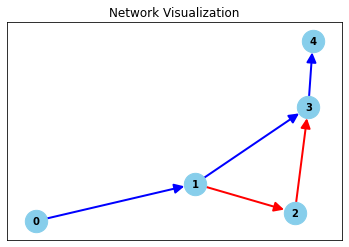

In [5]:
my_network.visualize(custom_seed = 1)

# Simulate

In [6]:
packets_in_flight, tunnel_backlogs = my_network.simulate(overlay_service_rates, total_time = 100000, custom_seed = 5)

## Store Data

In [7]:
file_name = 'my_save'
np.save(file_name + '_packets_in_flight.npy', packets_in_flight) # store array as a .npy file
np.save(file_name + '_tunnel_backlogs.npy', tunnel_backlogs) # store array as a .npy file
with open(file_name + '_my_network.pkl', 'wb') as file: # store class as a .pkl file
    pickle.dump(my_network, file)

## Load Data (for example)

In [8]:
packets_in_flight_loaded = np.load(file_name + '_packets_in_flight.npy')
tunnel_backlogs_loaded = np.load(file_name + '_tunnel_backlogs.npy')
with open(file_name + '_my_network.pkl', 'rb') as file:
    my_network_loaded = pickle.load(file)

### Some visualizations of loaded data

Shape of packets in flight (X) = (100000, 2)
Shape of total tunnel backlogs (Y) = (100000, 2)


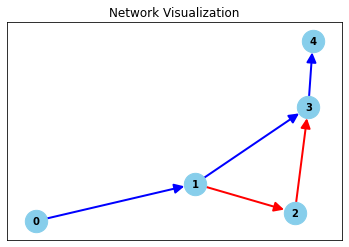

In [9]:
print('Shape of packets in flight (X) = ' + str(packets_in_flight_loaded.shape))
print('Shape of total tunnel backlogs (Y) = ' + str(tunnel_backlogs_loaded.shape))
my_network_loaded.visualize(custom_seed = 1)

In [10]:
import matplotlib.pyplot as plt
def running_average(arr, window_size = 1000):
    cumsum = np.cumsum(np.insert(arr, 0, 0))
    running_avg = (cumsum[window_size:] - cumsum[:-window_size]) / window_size
    return running_avg

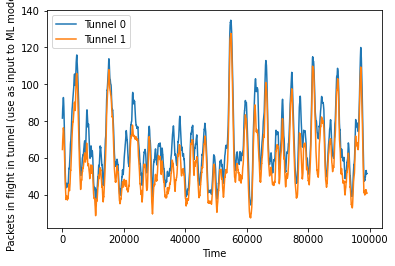

In [11]:
plt.plot(running_average(tunnel_backlogs_loaded[:,0]), label='Tunnel 0')
plt.plot(running_average(tunnel_backlogs_loaded[:,1]), label='Tunnel 1')
plt.legend()
plt.ylabel('Packets in flight in tunnel (use as input to ML model)')
plt.xlabel('Time')
plt.show()

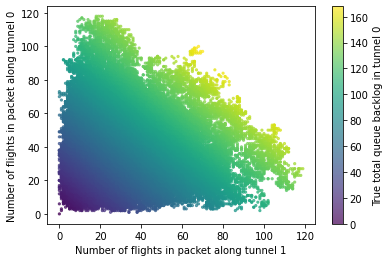

In [12]:
plt.scatter(packets_in_flight_loaded[:, 1], packets_in_flight_loaded[:, 0], c=tunnel_backlogs_loaded[:,0], cmap='viridis', s=5, alpha=0.7)
plt.xlabel('Number of flights in packet along tunnel 1')
plt.ylabel('Number of flights in packet along tunnel 0')
cbar = plt.colorbar()
cbar.set_label('True total queue backlog in tunnel 0')

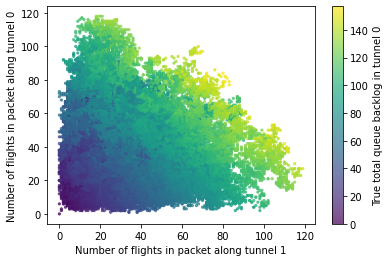

In [13]:
plt.scatter(packets_in_flight_loaded[:, 1], packets_in_flight_loaded[:, 0], c=tunnel_backlogs_loaded[:,1], cmap='viridis', s=5, alpha=0.7)
plt.xlabel('Number of flights in packet along tunnel 1')
plt.ylabel('Number of flights in packet along tunnel 0')
cbar = plt.colorbar()
cbar.set_label('True total queue backlog in tunnel 0')